<a href="https://colab.research.google.com/github/Ehtisham1053/Natural-Language-Processing/blob/main/word2vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🛠️ Step 1: Install and Import Dependencies

In [ ]:
import os
os._exit(00)  # Force restart runtime


In [1]:
!pip install --no-cache-dir --force-reinstall numpy gensim nltk matplotlib scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 74.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 132.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 148.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 73.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 134.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.9/101.9 kB 257.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 250.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 223.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 286.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 231.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 233.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.2/326.2 kB 207.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [10]:
# Import necessary libraries
import gensim
from gensim.models import Word2Vec
import nltk
from nltk.tokenize import word_tokenize
import string
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from wordcloud import WordCloud
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('stopwords')
# Download NLTK tokenizer data
nltk.download('punkt')

print("All dependencies installed successfully!")


All dependencies installed successfully!


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# step 3

In [17]:

from nltk.corpus import stopwords
# ✅ Step 3: Define Preprocessing Function (Remove Stopwords + Tokenization)
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    tokens = word_tokenize(text)  # Tokenization
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]  # Remove punctuation & stopwords
    return tokens

In [12]:
# ✅ Step 4: Download IMDb Dataset (Real Movie Reviews)
!wget -q https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar -xzf aclImdb_v1.tar.gz

In [14]:
import os

In [18]:
# ✅ Step 5: Load IMDb Reviews (5000 Positive + 5000 Negative)
def load_imdb_reviews(directory, limit=5000):
    texts = []
    for filename in os.listdir(directory)[:limit]:
        with open(os.path.join(directory, filename), encoding='utf-8') as f:
            texts.append(f.read())
    return texts

# Load IMDb movie reviews
pos_reviews = load_imdb_reviews("aclImdb/train/pos")
neg_reviews = load_imdb_reviews("aclImdb/train/neg")
imdb_reviews = pos_reviews + neg_reviews  # Combine reviews

print(f"✅ Loaded {len(imdb_reviews)} IMDb Movie Reviews!")

✅ Loaded 10000 IMDb Movie Reviews!


In [19]:
# ✅ Step 6: Tokenize and Preprocess Text Data
tokenized_reviews = [preprocess_text(review) for review in imdb_reviews]
print("\n✅ Sample Preprocessed Review:\n", tokenized_reviews[0])


✅ Sample Preprocessed Review:
 ['way', 'wind', 'blows', 'tom', 'barmans', 'also', 'know', 'front', 'man', 'rock', 'formation', 'debut', 'movie', 'entirely', 'shot', 'antwerp', 'belgium', 'movie', 'starts', 'sunny', 'friday', 'morning', 'skips', 'rather', 'superficially', 'events', 'fill', 'day', 'dozen', 'main', 'characters', 'movie', 'ends', 'lot', 'stuff', 'think', 'different', 'left', 'wide', 'br', 'br', 'movie', 'purely', 'instrumental', 'sound', 'track', 'rock', 'socks', 'scenes', 'music', 'truly', 'enhances', 'general', 'atmosphere', 'feel', 'really', 'making', 'movie', 'hallucinating', 'watch', 'certain', 'points', 'time', 'main', 'scene', 'film', 'party', 'well', 'br', 'br', 'director', 'hesitate', 'use', 'video', 'clip', 'techniques', 'main', 'characters', 'dancing', 'one', 'best', 'sound', 'tracks', 'heard', 'br', 'br', 'screenplay', 'great', 'stuff', 'camera', 'angles', 'colors', 'well', 'chosen', 'hot', 'loved', 'br', 'br', 'thing', 'liked', 'movie', 'subtle', 'touches', '

In [20]:
# ✅ Step 7: Train Word2Vec Model
model = Word2Vec(sentences=tokenized_reviews, vector_size=100, window=5, min_count=2, workers=4, sg=1)

In [21]:
# ✅ Step 8: Save Model
model.save("word2vec-imdb.model")
print("\n✅ Word2Vec Model Trained and Saved!")


✅ Word2Vec Model Trained and Saved!


In [22]:
# ✅ Step 9: Load the Trained Model
model = Word2Vec.load("word2vec-imdb.model")

In [23]:
# ✅ Step 10: Find Similar Words for "action"
try:
    similar_words = model.wv.most_similar("action", topn=5)
    print("\n🎬 Words Similar to 'action':")
    for word, similarity in similar_words:
        print(f"{word}: {similarity:.4f}")
except KeyError:
    print("\n⚠️ Word 'action' not found in vocabulary. Try another word!")


🎬 Words Similar to 'action':
thrills: 0.7377
packed: 0.7218
stunts: 0.7212
loads: 0.7067
shocks: 0.7007


In [24]:
# ✅ Step 11: Recommend Movies Similar to "Inception"
try:
    similar_movies = model.wv.most_similar("inception", topn=3)
    print("\n🎥 Movies Similar to 'Inception':")
    for movie, similarity in similar_movies:
        print(f"{movie}: {similarity:.4f}")
except KeyError:
    print("\n⚠️ Word 'inception' not found in vocabulary. Try another word!")


🎥 Movies Similar to 'Inception':
whitman: 0.9872
merquise: 0.9859
asunder: 0.9850


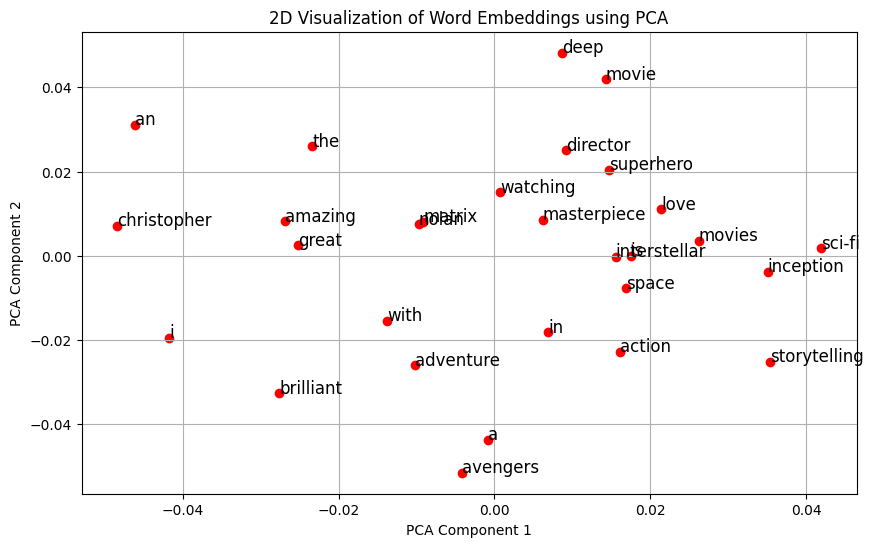

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Sample dataset of movie-related sentences
sentences = [
    "Inception is a great sci-fi movie",
    "The Matrix is a masterpiece in action movies",
    "Interstellar is an amazing space adventure",
    "Avengers is a superhero movie with great action",
    "I love watching movies with deep storytelling",
    "Christopher Nolan is a brilliant director",
]

# Tokenize sentences
tokenized_sentences = [word_tokenize(sentence.lower()) for sentence in sentences]

# Train Word2Vec model
word2vec_model = Word2Vec(tokenized_sentences, vector_size=50, window=3, min_count=1, sg=0)

# Extract word vectors
word_vectors = np.array([word2vec_model.wv[word] for word in word2vec_model.wv.index_to_key])
words = list(word2vec_model.wv.index_to_key)

# Apply PCA to reduce dimensionality from 50D to 2D
pca = PCA(n_components=2)
word_vectors_2d = pca.fit_transform(word_vectors)

# Plot word vectors in 2D
plt.figure(figsize=(10, 6))
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1], marker='o', color='red')

# Annotate each point with the corresponding word
for i, word in enumerate(words):
    plt.annotate(word, (word_vectors_2d[i, 0], word_vectors_2d[i, 1]), fontsize=12)

plt.title("2D Visualization of Word Embeddings using PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid()
plt.show()


In [ ]:
import gensim.downloader as api

# Load the Google News Pre-trained Word2Vec Model
word2vec_pretrained = api.load("word2vec-google-news-300")

# Find similar words to 'movie'
similar_words = word2vec_pretrained.most_similar('movie', topn=5)

# Display similar words
print("Words similar to 'movie':")
for word, similarity in similar_words:
    print(f"{word}: {similarity:.4f}")

# Find similarity between two words
word1, word2 = "king", "queen"
similarity_score = word2vec_pretrained.similarity(word1, word2)
print(f"\nSimilarity between '{word1}' and '{word2}': {similarity_score:.4f}")


[==============------------------------------------] 28.1% 467.3/1662.8MB downloaded